In [2]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt

## Data importing and preprocessing

In [3]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)   
excel_list.sort()

## Directed Weighted Network Creation

In [4]:
# Creating networks and stroing them

graphs = []
passengers = []   # records number of total passengers(month wise)
lbls = []
for i in excel_list:
    path = "Raw_Data/"+i
    excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
    passengers.append(sum(excel["to"]) + sum(excel["from"]))
    lbls.append(i[:-4])
    G = nx.DiGraph()
    print(path)
    for i in range(1,len(excel)+1):
        weight1 = excel["to"][i]
        if(weight1 != 0):
            G.add_edge(excel["city1"][i],excel["city2"][i],weight=weight1)
        weight2 = excel["from"][i]
        if(weight2 != 0):
            G.add_edge(excel["city2"][i],excel["city1"][i],weight=weight2)
    graphs.append(G)

Raw_Data/1505.csv
Raw_Data/1506.csv
Raw_Data/1507.csv
Raw_Data/1508.csv
Raw_Data/1509.csv
Raw_Data/1510.csv
Raw_Data/1511.csv
Raw_Data/1512.csv
Raw_Data/1601.csv
Raw_Data/1602.csv
Raw_Data/1603.csv
Raw_Data/1604.csv
Raw_Data/1605.csv
Raw_Data/1606.csv
Raw_Data/1607.csv
Raw_Data/1608.csv
Raw_Data/1609.csv
Raw_Data/1610.csv
Raw_Data/1611.csv
Raw_Data/1612.csv
Raw_Data/1701.csv
Raw_Data/1702.csv
Raw_Data/1703.csv
Raw_Data/1704.csv
Raw_Data/1705.csv
Raw_Data/1706.csv
Raw_Data/1707.csv
Raw_Data/1708.csv
Raw_Data/1709.csv
Raw_Data/1710.csv
Raw_Data/1711.csv
Raw_Data/1712.csv
Raw_Data/1801.csv
Raw_Data/1802.csv
Raw_Data/1803.csv
Raw_Data/1804.csv
Raw_Data/1805.csv
Raw_Data/1806.csv
Raw_Data/1807.csv
Raw_Data/1808.csv
Raw_Data/1809.csv
Raw_Data/1810.csv
Raw_Data/1811.csv
Raw_Data/1812.csv
Raw_Data/1901.csv
Raw_Data/1902.csv
Raw_Data/1903.csv
Raw_Data/1904.csv
Raw_Data/1905.csv
Raw_Data/1906.csv
Raw_Data/1907.csv
Raw_Data/1908.csv
Raw_Data/1909.csv
Raw_Data/1910.csv
Raw_Data/1911.csv
Raw_Data/1

## Network Visualization

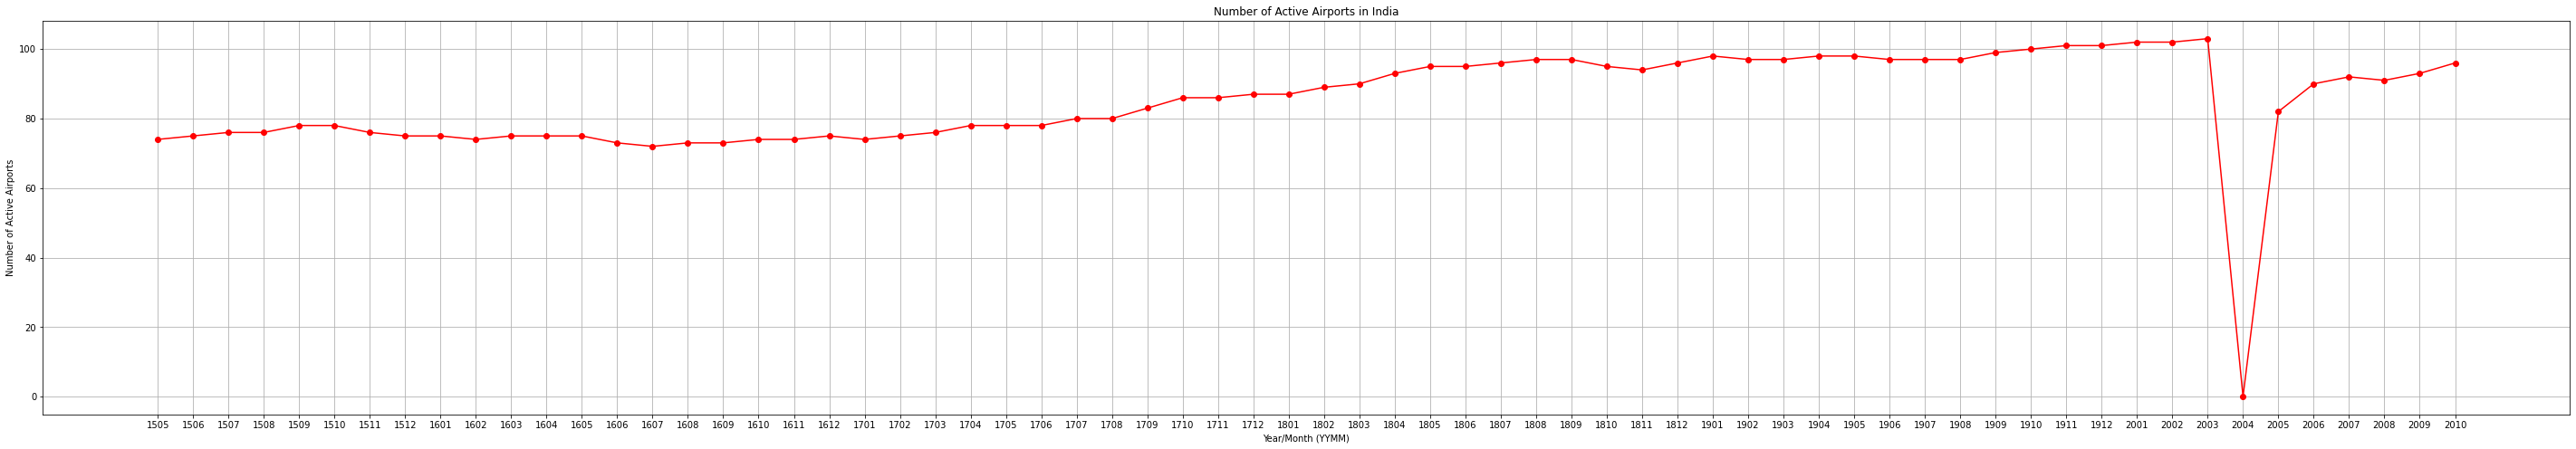

In [5]:
nodes = []
for i in range(len(graphs)):
    nodes.append(len(graphs[i].nodes()))

plt.plot(nodes, color="red", marker="o")
plt.xlabel("Year/Month (YYMM)")
plt.xticks([i for i in range(66)], labels = lbls)
plt.ylabel("Number of Active Airports")
plt.title("Number of Active Airports in India")
plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/nodes')
plt.show()

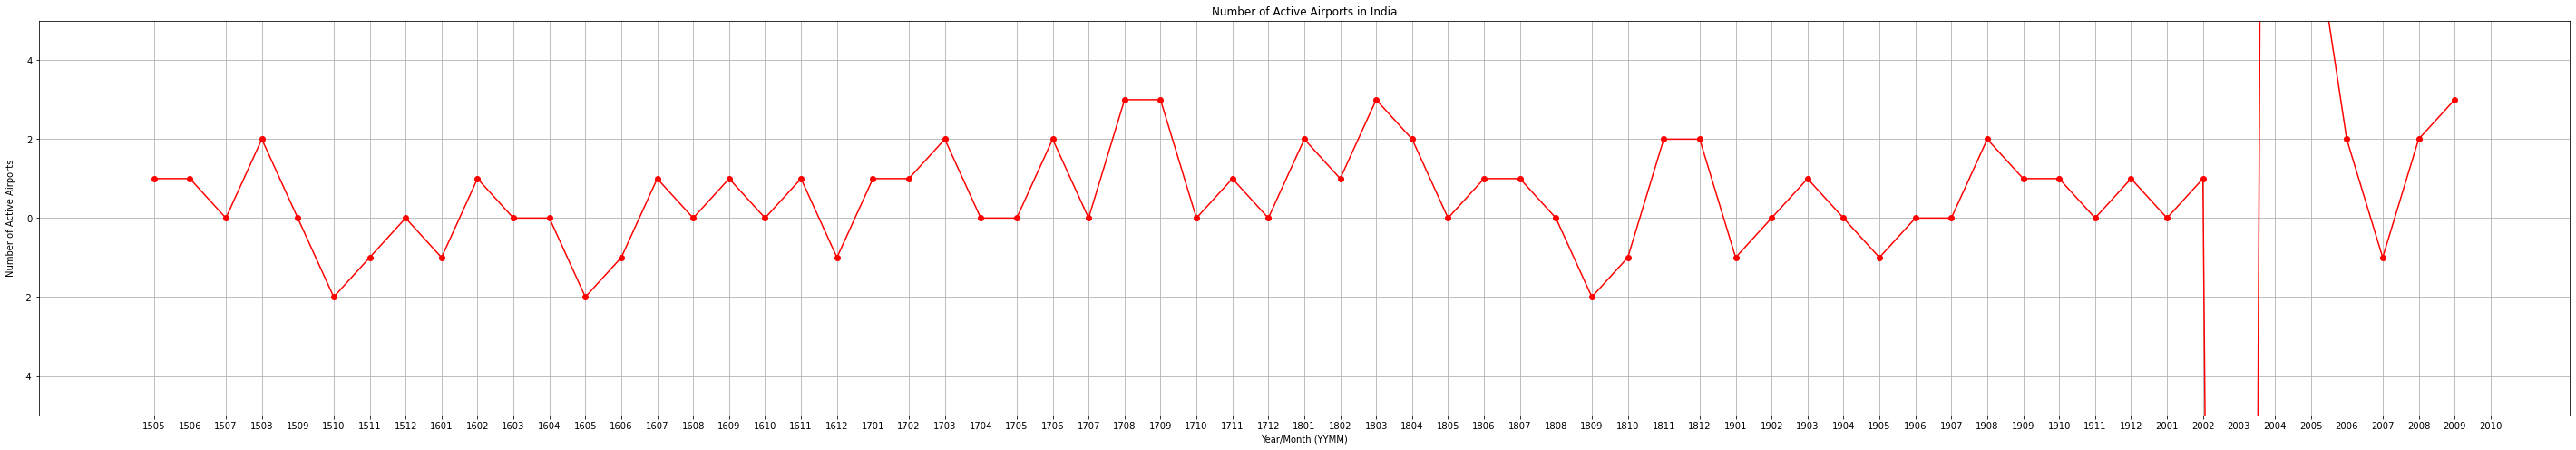

In [9]:
nnodes = []
for i in range(1,len(graphs)):
    nnodes.append(len(graphs[i].nodes()) - len(graphs[i-1].nodes()))

plt.plot(nnodes, color="red", marker="o")
plt.xlabel("Year/Month (YYMM)")
plt.xticks([i for i in range(66)], labels = lbls)
plt.ylabel("Number of Active Airports")
plt.title("Number of Active Airports in India")
plt.grid(True)
plt.ylim(-5,5)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/newnodes')
plt.show()

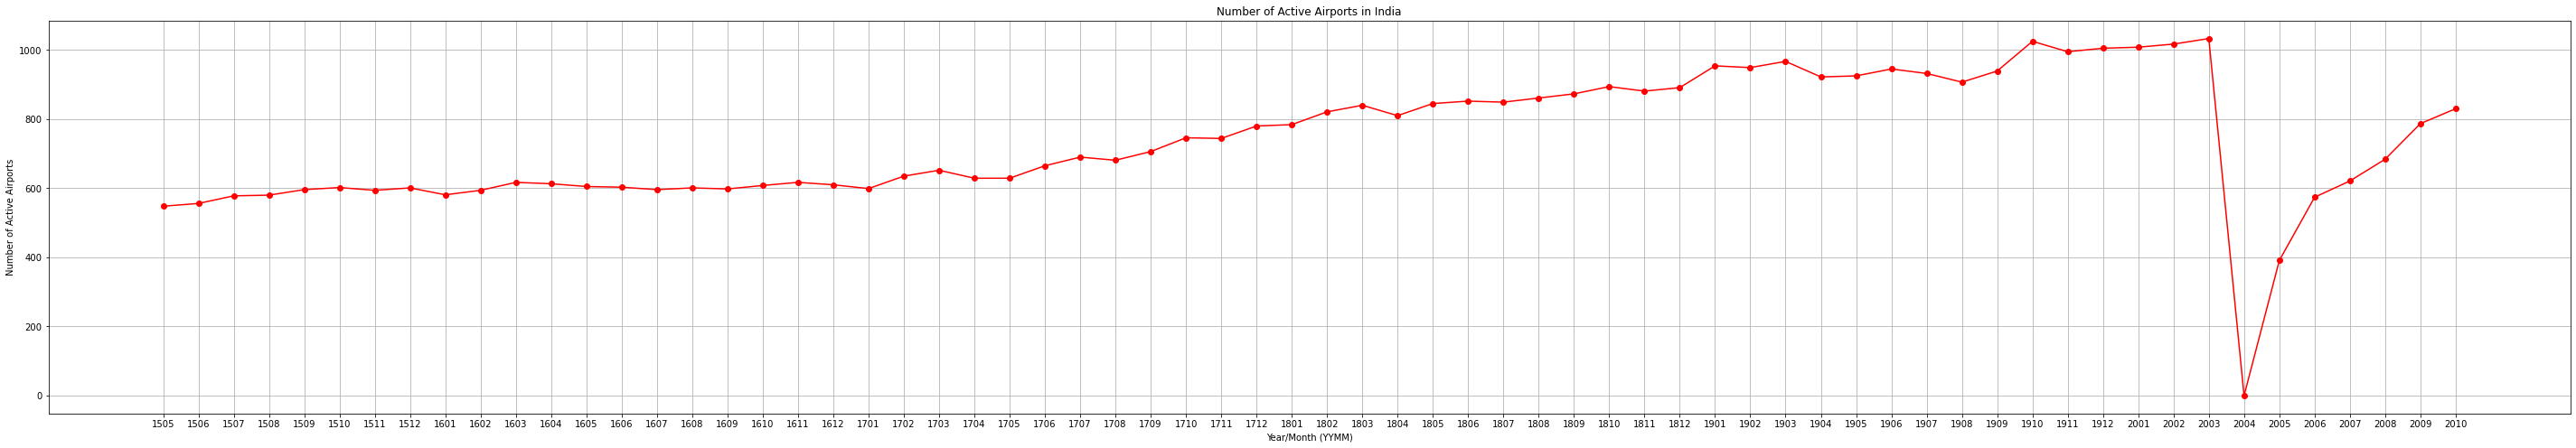

In [6]:
edges = []
for i in range(len(graphs)):
    nodes.append(len(graphs[i].edges()))

plt.plot(edges, color="red", marker="o")
plt.xlabel("Year/Month (YYMM)")
plt.xticks([i for i in range(66)], labels = lbls)
plt.ylabel("Number of Active Airports")
plt.title("Number of Active Airports in India")
plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/edges')
plt.show()

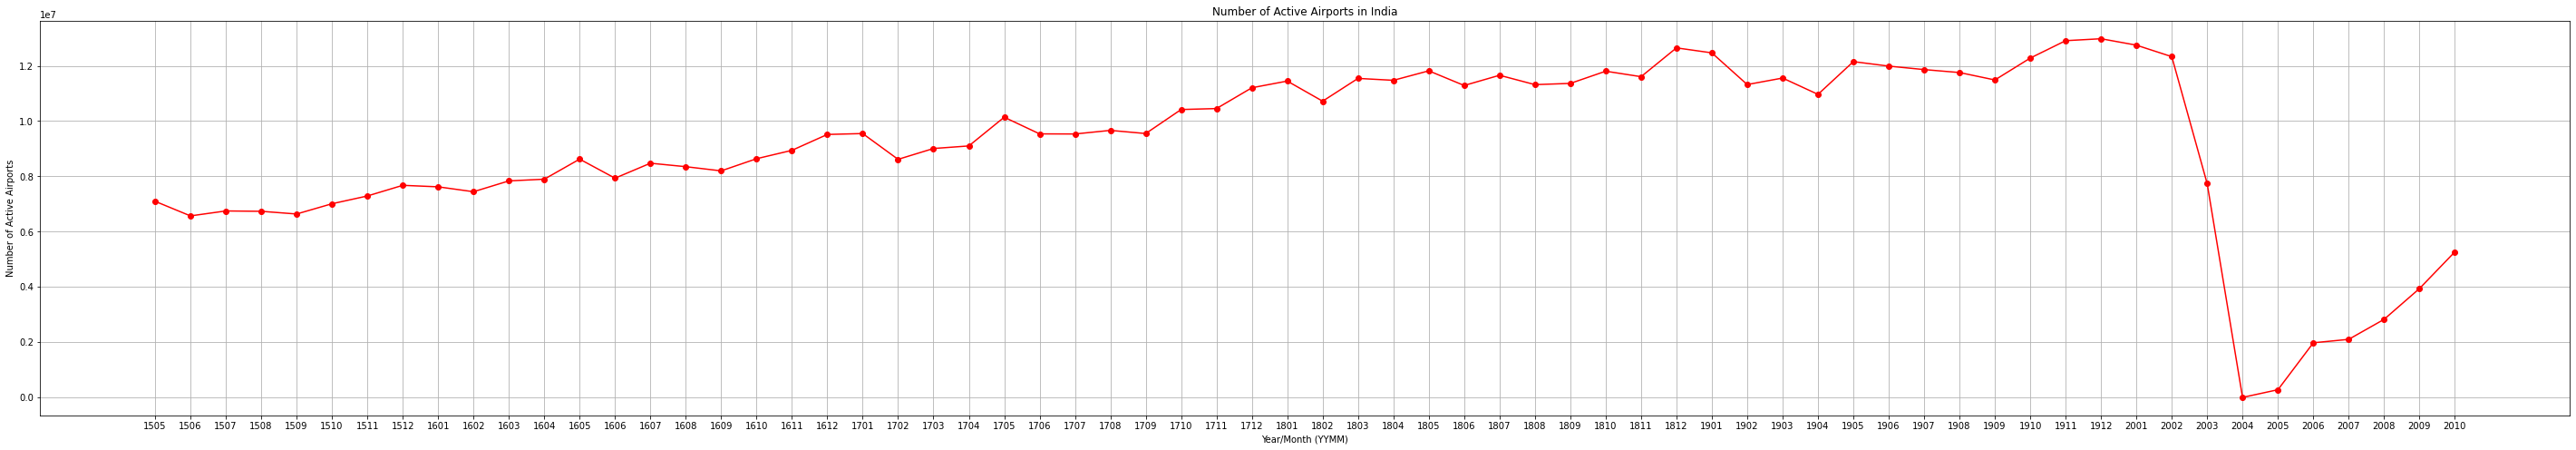

In [54]:
plt.plot(passengers, color="red",  marker="o")
plt.xlabel("Year/Month (YYMM)")
plt.xticks([i for i in range(66)],labels = lbls)
plt.ylabel("Number of Active Airports")
plt.title("Number of Active Airports in India")
plt.grid(True)
figure = plt.gcf()
figure.set_size_inches(50, 8)
plt.savefig('Output_Files/matplotlib/passengers')
plt.show()